# DATA GATHERING

In [1]:
#Reopen the database connection
import pymysql
#The next raw is masked for privacy data policy
db = pymysql.connect(host="127.0.0.1",user = "*****",passwd ="*****",database ="*****", port=*****)

# prepare a cursor object using cursor() method
cursor = db.cursor()

# execute SQL query to create a dataframe(the same dataframe of the excel spreadsheet Orders)
import pandas as pd

# this sql query is the one that produces the view saved in the MySQL database as 'v.orders'
orders = pd.read_sql_query("select distinct `o`.`id` AS `id`,`o`.`description` AS `description`,`o`.`type` AS `type`,`o`.`user_id` AS `user_id`,`o`.`pickup_address_id` AS `pickup_address_id`,`o`.`delivery_address_id` AS `delivery_address_id`,`o`.`locker_code` AS `locker_code`,`o`.`unique_code` AS `unique_code`,`o`.`status` AS `status`,`o`.`payment_status` AS `payment_status`,`o`.`invoice_id` AS `invoice_id`,`o`.`vat` AS `vat`,`o`.`sub_total` AS `sub_total`,`o`.`delivery_costs` AS `delivery_costs`,`o`.`discount_total` AS `discount_total`,`o`.`grand_total` AS `grand_total`,`o`.`locked` AS `locked`,`o`.`due` AS `due`,case when `o`.`primary_service_provider_id` is not null then `o`.`primary_service_provider_id` when `sp2`.`service_provider_id` is not null then `sp2`.`service_provider_id` end AS `primary_service_provider_id`,case when `o`.`primary_service_provider_id` is not null then `sp`.`name` when `sp2`.`service_provider_id` is not null then `sp2`.`service_provider_name` end AS `primary_sp_name`,case when `o`.`primary_service_provider_id` is not null then `sp`.`type` when `sp2`.`service_provider_id` is not null then `sp2`.`primary_sp_type` end AS `primary_sp_type`,case when `o`.`primary_service_provider_id` is not null then `sp`.`primary_service_description` when `sp2`.`service_provider_id` is not null then `sp2`.`service_provider_name` end AS `primary_service_description`,case when `o`.`primary_service_provider_id` is not null then 'Servicios' when `sp2`.`service_provider_id` is not null then 'Servicios' else 'Paqueteria' end AS `primary_sp_type_gral`,`o`.`route_leg_id` AS `route_leg_id`,`o`.`pickup_reminder_counter` AS `pickup_reminder_counter`,`o`.`last_reminder_time` AS `last_reminder_time`,`o`.`cancelled_at` AS `cancelled_at`,`o`.`created_at` AS `created_at`,`o`.`updated_at` AS `updated_at`,`o`.`confirmed_at` AS `confirmed_at`,`o`.`active_from` AS `active_from`,`o`.`original_id` AS `original_id`,date_format(`o`.`created_at`,'%Y-%m-%d') AS `date`,year(`o`.`created_at`) AS `date_created_year`,month(`o`.`created_at`) AS `date_created_month`,concat(month(`o`.`created_at`),'-',year(`o`.`created_at`)) AS `date_month_year`,dayofmonth(`o`.`created_at`) AS `date_created_day`,monthname(`o`.`created_at`) AS `date_created_monthName`,date_format(`o`.`created_at`,'%W') AS `date_creted_day_Name`,hour(`o`.`created_at`) AS `date_created_hour`,`opr`.`promotion_id` AS `promotion_id`,`opr`.`discount` AS `discount`,`pr`.`promo_code` AS `promo_code`,`pr`.`type` AS `promo_type`,`pr`.`value` AS `promo_value`,`pr`.`service_provider_id` AS `promo_service_provider_id`,`sp`.`name` AS `promo_service_provider`,`u`.`first_name` AS `first_name`,`u`.`last_name` AS `last_name`,`u`.`phone_number` AS `phone_number`,`u`.`email` AS `email`,`u`.`advertising_consent` AS `advertising_consent`,date_format(`u`.`created_at`,'%Y-%m-%d') AS `date_alta_user`,`l`.`channel_id` AS `channel_id`,`ch`.`name` AS `channel_name`,case when `o`.`primary_service_provider_id` in (40,41,46) then 'Lavalocker' when `sp2`.`service_provider_id` in (40,41,46) then 'Lavalocker' when `o`.`primary_service_provider_id` is null then 'Null' when `sp2`.`service_provider_id` is null then 'Null' when `ch`.`name` is null then 'Null' else `ch`.`name` end AS `Canal`,`o`.`locker_id` AS `locker_id`,`l`.`name` AS `locker_name`,`l`.`location_town_city` AS `location_town_city`,`l`.`status` AS `locker_status`,`lc`.`display_number` AS `locker_dismplay_number`,`lc`.`block` AS `locker_block`,`lc`.`locker_cell_size_id` AS `locker_cell_size_id`,`lcs`.`name` AS `locker_size_name`,`o`.`locked_by_user_id` AS `locked_by_user_id`,`o`.`locker_cell_id` AS `locker_cell_id`,`o`.`drop_off_locker_cell_id` AS `drop_off_locker_cell_id`,`o`.`pick_up_locker_cell_id` AS `pick_up_locker_cell_id`,`o`.`drop_off_locker_cell_size_id` AS `drop_off_locker_cell_size_id`,timestampdiff(DAY,`o`.`confirmed_at`,`o`.`updated_at`) AS `recogida_dias`,concat(timestampdiff(HOUR,`o`.`confirmed_at`,`o`.`updated_at`) MOD 24,':',timestampdiff(MINUTE,`o`.`confirmed_at`,`o`.`updated_at`) MOD 60) AS `recogida_horas`,`u`.`language_code` AS `language_code`,replace(`l`.`coordinates_long`,',','.') AS `coordinates_lat`,replace(`l`.`coordinates_lat`,',','.') AS `coordinates_long`,concat(convert(replace(`l`.`coordinates_long`,',','.') using utf8mb4),', ',convert(replace(`l`.`coordinates_lat`,',','.') using utf8mb4)) AS `coordinates_lat_long`,year(`l`.`created_at`) AS `date_created_year_locker`,month(`l`.`created_at`) AS `date_created_month_locker`,`o`.`courier` AS `courier`,`u`.`channel_id` AS `user_channel_id`,`chu`.`name` AS `user_channel_name`,`l`.`mktg` AS `mktg`,`o`.`deleted_at` AS `deleted_at`,`u`.`invoice_payments` AS `invoice_payments`,`o`.`discount_total` + `o`.`grand_total` AS `Gross`,`o`.`rating` AS `rating` from ((((((((((`mayordomo`.`orders` `o` left join `mayordomo`.`lockers` `l` on(`o`.`locker_id` = `l`.`id`)) left join `mayordomo`.`order_promotions` `opr` on(`opr`.`order_id` = `o`.`id`)) left join `mayordomo`.`promotions` `pr` on(`pr`.`id` = `opr`.`promotion_id`)) left join `mayordomo`.`service_providers` `sp` on(`sp`.`id` = `o`.`primary_service_provider_id`)) left join `mayordomo`.`users` `u` on(`u`.`id` = `o`.`user_id`)) left join `mayordomo`.`channels` `ch` on(`ch`.`id` = `l`.`channel_id`)) left join `mayordomo`.`channels` `chu` on(`chu`.`id` = `u`.`channel_id`)) left join `mayordomo`.`locker_cells` `lc` on(`lc`.`locker_id` = `o`.`locker_id` and `lc`.`id` = `o`.`drop_off_locker_cell_id`)) left join `mayordomo`.`locker_cell_sizes` `lcs` on(`lcs`.`id` = `lc`.`locker_cell_size_id`)) left join `mayordomo`.`v_orders_services_provider` `sp2` on(`o`.`id` = `sp2`.`order_id`)) where `o`.`deleted_at` is null", db)
print(orders)

            id description                type  user_id  pickup_address_id  \
0          196        None                None        2                NaN   
1          199        None                None       26                NaN   
2          205        None                None       29                NaN   
3          229        None                None       36                NaN   
4          247        None                None       41                NaN   
...        ...         ...                 ...      ...                ...   
158215  174596        None       amazon_return    13767                NaN   
158216  174597        None  delivery_with_code    24425                NaN   
158217  174598        None       amazon_return    18373                NaN   
158218  174599        None       amazon_return    18373                NaN   
158219  174600        None        locker_order    25257                NaN   

        delivery_address_id locker_code unique_code  \
0       

# DATA CLEANING

In [2]:
#FILTERING AND CLEANING THE DATABASE (1)

#I filter out the orders made from Lagoon and Lavalocker because those are not smartpoints
orders1 = orders[~orders["locker_name"].isin(["Lavalocker Domicilios", "Lagoon"])]

#I filter out the orders made from the smartpoints that have status that is not "online"
orders12 = orders1[orders1['locker_status']=="Online"]

#Smartpoints we filter out because are in Incubacion
orders12 = orders12[~orders12["locker_name"].isin(['Marques de Pombal', 'Mendez Alvaro','BeCorp Modolell', 'Ausias March 41', 'Torre Zen', 'Vinyar 21'])]

#Other smartpoints we want to filter out
orders12 = orders12[~orders12["locker_name"].isin(['Girona', 'KNEM', 'Mayordomo Ramon Turro'])]

In [3]:
#Checking for users that used more than one smartpoint
users_multilocker = orders12.groupby(["user_id", "locker_name"]).size()
users_multilocker = users_multilocker.to_frame()
users_multilocker = users_multilocker.reset_index()

users_multilocker1 = users_multilocker.user_id.value_counts()
users_multilocker1 = users_multilocker1.to_frame()
users_multilocker1 = users_multilocker1.reset_index()
users_multilocker1 = users_multilocker1[users_multilocker1['user_id']>1]
users_multilocker1

list_multilocker = users_multilocker1["index"].tolist()
list_multilocker


users_multilocker_final = users_multilocker.query('user_id in @list_multilocker')

In [4]:
#Deleting users that have orders from smartpoints that are not correlated among them(so are probably experiment orders)

#I filter out a list of users based on the df: users_multilocker_final

orders12 = orders12[~orders12["user_id"].isin([1,8,590,2493,3274,3486,3727,6940,11447,11970,12437,13061,13100,13748,16302,5922, 10058, 16493, 16836])]

In [5]:
#FILTERING AND CLEANING THE DATABASE (2)

#I detect the columns I need: 'user_id', 'created at', 'grand_total',  
orders2 = orders12[["user_id", "grand_total", "created_at"]]
print(orders2.info())

#I check for missing values in all the columns
print(orders2.isnull().sum())

#We look at the main metrics for the column grand_total(the metric for user_id do not make sense)
print(orders2.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117481 entries, 49 to 158219
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      117481 non-null  int64         
 1   grand_total  117481 non-null  float64       
 2   created_at   117481 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.6 MB
None
user_id        0
grand_total    0
created_at     0
dtype: int64
             user_id    grand_total
count  117481.000000  117481.000000
mean     9132.819341       0.474215
std      6850.671739       4.919169
min         3.000000       0.000000
25%      3917.000000       0.000000
50%      7207.000000       0.000000
75%     14649.000000       0.000000
max     25257.000000     609.840000


# COHORT ANALYSIS FOR CHURN RATE (with months)

In [39]:
orders2

,user_id,grand_total,created_at
49,121,12.99,2016-09-08 21:17:22
51,110,0.00,2016-09-12 16:36:04
52,110,0.00,2016-09-12 16:36:41
53,142,0.00,2016-09-13 18:16:33
55,148,0.00,2016-09-14 19:54:21
...,...,...,...
158215,13767,0.00,2021-06-09 19:05:46
158216,24425,0.00,2021-06-09 19:09:11
158217,18373,0.00,2021-06-09 21:53:06
158218,18373,0.00,2021-06-09 21:53:55


In [40]:
#Rename daataframe and columns
df = orders2.copy()
df.rename(columns={"user_id": "Customer ID", "grand_total": "UnitPrice", "created_at": "InvoiceDate"}, inplace=True)

# convert customerid to int
df['Customer ID'] = (df['Customer ID']).astype(int)
df

,Customer ID,UnitPrice,InvoiceDate
49,121,12.99,2016-09-08 21:17:22
51,110,0.00,2016-09-12 16:36:04
52,110,0.00,2016-09-12 16:36:41
53,142,0.00,2016-09-13 18:16:33
55,148,0.00,2016-09-14 19:54:21
...,...,...,...
158215,13767,0.00,2021-06-09 19:05:46
158216,24425,0.00,2021-06-09 19:09:11
158217,18373,0.00,2021-06-09 21:53:06
158218,18373,0.00,2021-06-09 21:53:55


In [41]:
#Cancel all the data of the ongoing month
df = df.query("InvoiceDate < '2021-06'")
df

,Customer ID,UnitPrice,InvoiceDate
49,121,12.99,2016-09-08 21:17:22
51,110,0.00,2016-09-12 16:36:04
52,110,0.00,2016-09-12 16:36:41
53,142,0.00,2016-09-13 18:16:33
55,148,0.00,2016-09-14 19:54:21
...,...,...,...
156589,18294,0.00,2021-05-31 17:37:33
156590,20310,0.00,2021-05-31 18:04:22
156591,19229,0.00,2021-05-31 18:30:54
156593,23537,0.00,2021-05-31 22:32:37


In [42]:
# Function that converts date to year month
import datetime as dt

def get_month(x):
    return dt.datetime(x.year, x.month, 1)
# Create the invoicemonth period column
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.head()

<ipython-input-42-2976dc7357bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)


,Customer ID,UnitPrice,InvoiceDate,InvoiceMonth
49,121,12.99,2016-09-08 21:17:22,2016-09-01
51,110,0.00,2016-09-12 16:36:04,2016-09-01
52,110,0.00,2016-09-12 16:36:41,2016-09-01
53,142,0.00,2016-09-13 18:16:33,2016-09-01
55,148,0.00,2016-09-14 19:54:21,2016-09-01


In [43]:
# Group by customerID and select only the invoicemonth column
grouping = df.groupby('Customer ID')['InvoiceMonth']
# Take the earliest date of each customer and assign it back to the orignal dataset
df['CohortMonth'] = grouping.transform('min')

<ipython-input-43-c19c74c19013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = grouping.transform('min')


In [44]:
# This function gets us the integer value of year and month

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month

# Get the integers for the date parts from the 'InvoiceMonth' column

invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')

# Get the integers for date parts from the 'Cohortmonth' column

cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

# Calculate difference in years

years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

<ipython-input-44-9ed2240230d8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = years_diff * 12 + months_diff + 1


,Customer ID,UnitPrice,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
49,121,12.99,2016-09-08 21:17:22,2016-09-01,2016-09-01,1
51,110,0.00,2016-09-12 16:36:04,2016-09-01,2016-09-01,1
52,110,0.00,2016-09-12 16:36:41,2016-09-01,2016-09-01,1
53,142,0.00,2016-09-13 18:16:33,2016-09-01,2016-09-01,1
55,148,0.00,2016-09-14 19:54:21,2016-09-01,2016-09-01,1


In [45]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
# Count the number of unique values per Customer ID
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()
# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

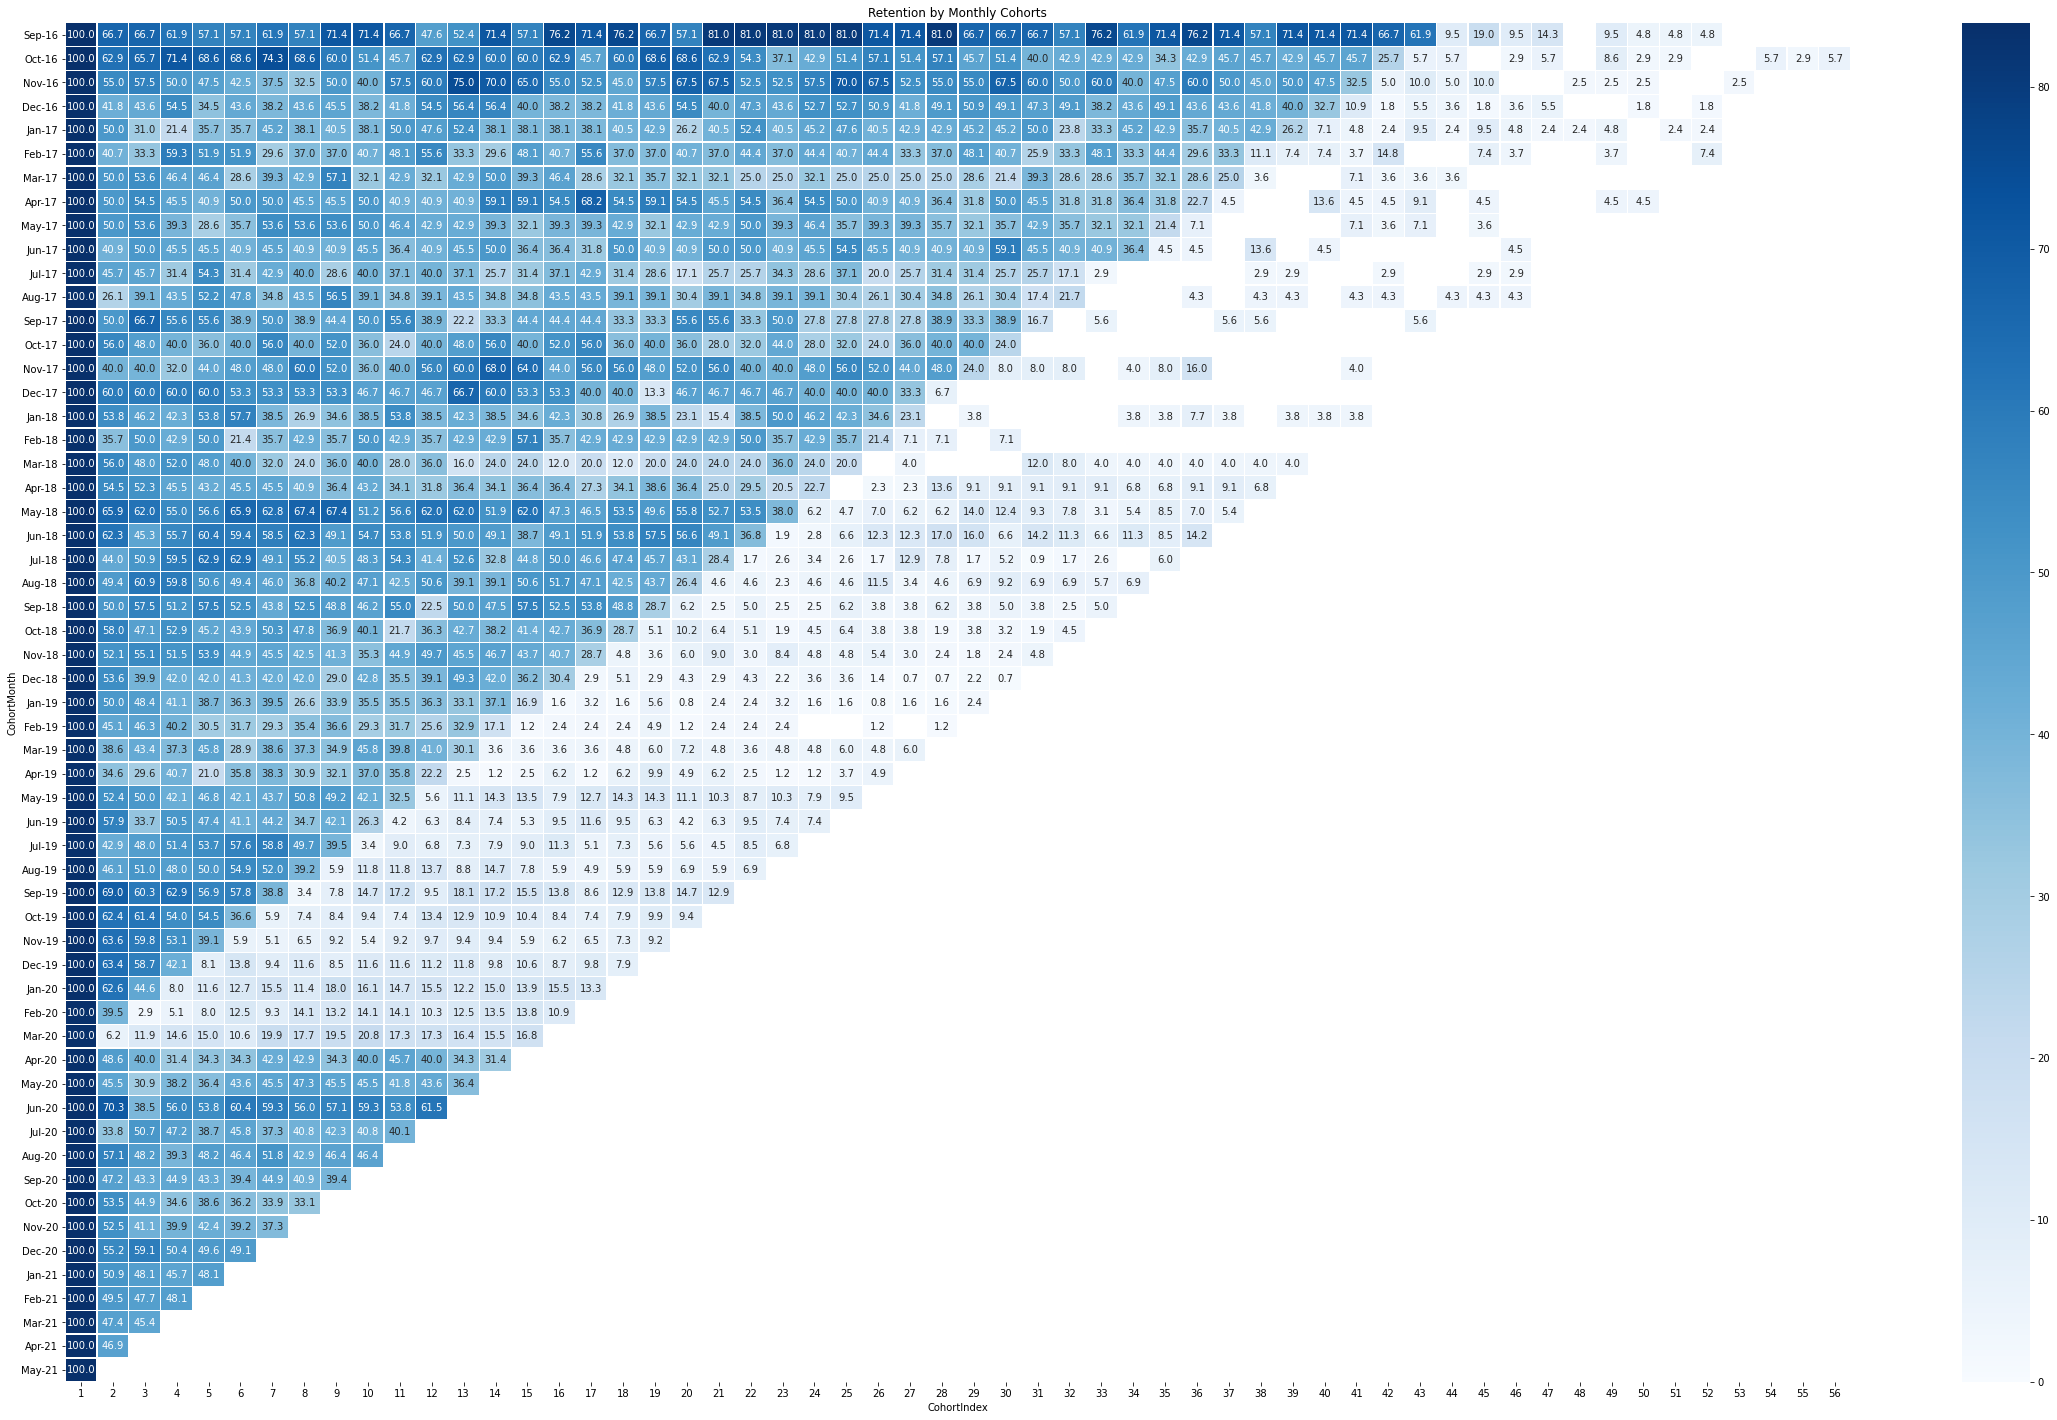

In [47]:
# Create list of month names for visualisation
month_list = retention.reset_index()['CohortMonth']
def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')
month_list = month_list.apply(get_month_name)

# Initialize inches plot figure
import matplotlib.pyplot as plt
plt.figure(figsize=(40,25))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
import seaborn as sns
sns.heatmap(data=retention,
annot = True,
cmap = "Blues",
vmin = 0.0,
vmax = list(retention.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=month_list)
plt.savefig('MonthlyCohortAnalysis.jpg')
plt.show();

# COHORT ANALYSIS FOR CHURN RATE (with trimester)

In [14]:
#RECALCULATE WITH TRIMESTERS (but before doing it calculate what was the time threshold before covid of inactivity to state that the user is lost)

In [32]:
#Rename daataframe and columns
df1 = orders2.copy()
df1.rename(columns={"user_id": "Customer ID", "grand_total": "UnitPrice", "created_at": "InvoiceDate"}, inplace=True)

# convert customerid to int
df1['Customer ID'] = (df1['Customer ID']).astype(int)
df1

,Customer ID,UnitPrice,InvoiceDate
49,121,12.99,2016-09-08 21:17:22
51,110,0.00,2016-09-12 16:36:04
52,110,0.00,2016-09-12 16:36:41
53,142,0.00,2016-09-13 18:16:33
55,148,0.00,2016-09-14 19:54:21
...,...,...,...
158215,13767,0.00,2021-06-09 19:05:46
158216,24425,0.00,2021-06-09 19:09:11
158217,18373,0.00,2021-06-09 21:53:06
158218,18373,0.00,2021-06-09 21:53:55


In [33]:
#Cancel all the data of the ongoing month
df1 = df1.query("InvoiceDate < '2021-06'")
df1

,Customer ID,UnitPrice,InvoiceDate
49,121,12.99,2016-09-08 21:17:22
51,110,0.00,2016-09-12 16:36:04
52,110,0.00,2016-09-12 16:36:41
53,142,0.00,2016-09-13 18:16:33
55,148,0.00,2016-09-14 19:54:21
...,...,...,...
156589,18294,0.00,2021-05-31 17:37:33
156590,20310,0.00,2021-05-31 18:04:22
156591,19229,0.00,2021-05-31 18:30:54
156593,23537,0.00,2021-05-31 22:32:37


In [34]:
# Function that converts date to year month
import datetime as dt

def get_trimester(x):
    return dt.datetime(x.year, x.quarter, 1)
# Create the invoicemonth period column
df1['InvoiceTrimester'] = df1['InvoiceDate'].apply(get_trimester)
df1.head()

<ipython-input-34-b4ecfc7ccc17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceTrimester'] = df1['InvoiceDate'].apply(get_trimester)


,Customer ID,UnitPrice,InvoiceDate,InvoiceTrimester
49,121,12.99,2016-09-08 21:17:22,2016-03-01
51,110,0.00,2016-09-12 16:36:04,2016-03-01
52,110,0.00,2016-09-12 16:36:41,2016-03-01
53,142,0.00,2016-09-13 18:16:33,2016-03-01
55,148,0.00,2016-09-14 19:54:21,2016-03-01


In [35]:
# Group by customerID and select only the invoicemonth column
grouping = df1.groupby('Customer ID')['InvoiceTrimester']
# Take the earliest date of each customer and assign it back to the orignal dataset
df1['CohortTrimester'] = grouping.transform('min')

<ipython-input-35-1f11238b6764>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CohortTrimester'] = grouping.transform('min')


In [36]:
# This function gets us the integer value of year and trimester

def get_date_int(df1, column):
   year = df1[column].dt.year
   trimester = df1[column].dt.quarter
   return year, trimester

# Get the integers for the date parts from the 'InvoiceTrimester' column

invoice_year, invoice_trimester = get_date_int(df1, 'InvoiceTrimester')

# Get the integers for date parts from the 'Cohorttrimester' column

cohort_year, cohort_trimester = get_date_int(df1, 'CohortTrimester')

# Calculate difference in years

years_diff = invoice_year - cohort_year

# Calculate difference in trimesters
trimester_diff = invoice_trimester - cohort_trimester

# Extract the difference in trimesters from all previous values
df1['CohortIndex'] = years_diff * 12 + months_diff + 1
df1.head()

<ipython-input-36-a17968919cc3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CohortIndex'] = years_diff * 12 + months_diff + 1


,Customer ID,UnitPrice,InvoiceDate,InvoiceTrimester,CohortTrimester,CohortIndex
49,121,12.99,2016-09-08 21:17:22,2016-03-01,2016-03-01,1
51,110,0.00,2016-09-12 16:36:04,2016-03-01,2016-03-01,1
52,110,0.00,2016-09-12 16:36:41,2016-03-01,2016-03-01,1
53,142,0.00,2016-09-13 18:16:33,2016-03-01,2016-03-01,1
55,148,0.00,2016-09-14 19:54:21,2016-03-01,2016-03-01,1


In [37]:
grouping = df1.groupby(['CohortTrimester', 'CohortIndex'])
# Count the number of unique values per Customer ID
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()
# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortTrimester', columns='CohortIndex', values='Customer ID')
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

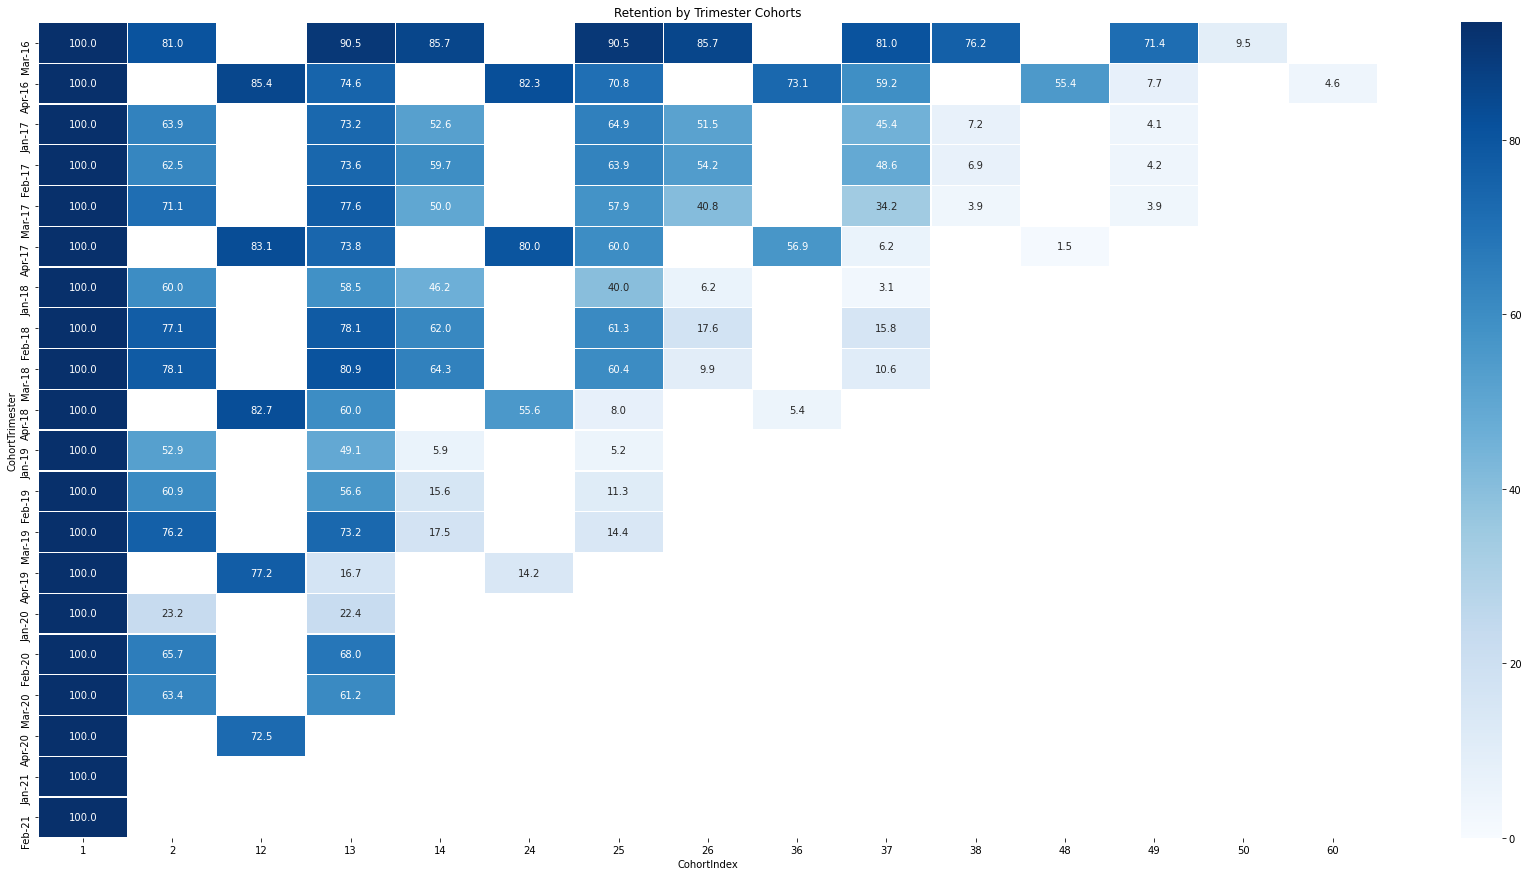

In [38]:
# Create list of month names for visualisation
trimester_list = retention.reset_index()['CohortTrimester']
def get_trimester_name(x):
   return dt.datetime.strftime(x, '%b-%y')
trimester_list = trimester_list.apply(get_trimester_name)

# Initialize inches plot figure
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))

# Add a title
plt.title('Retention by Trimester Cohorts')

# Create the heatmap
import seaborn as sns
sns.heatmap(data=retention,
annot = True,
cmap = "Blues",
vmin = 0.0,
vmax = list(retention.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=trimester_list)
plt.show();